In [24]:
import argparse
from pathlib import Path
import sys
from typing import Dict, List

#!/usr/bin/env python3
"""
Count images in each immediate subdirectory of a given root and plot a histogram.

Usage:
    python check_n_frames.py
    python check_n_frames.py --root "/path/to/root" [--recursive] [--save "hist.png"]

Default root:
    /home/phd2/Scrivania/CorsoData/blastocisti/blasto
"""

import matplotlib.pyplot as plt

def count_images_in_dir(d: Path, exts: set[str], recursive: bool = False) -> int:
    if recursive:
            return sum(1 for f in d.rglob("*") if f.is_file() and f.suffix.lower() in exts)
    else:
            return sum(1 for f in d.iterdir() if f.is_file() and f.suffix.lower() in exts)


def collect_counts(root: Path, exts: set[str], recursive: bool = False) -> Dict[Path, int]:
    if not root.exists() or not root.is_dir():
            raise ValueError(f"Root path does not exist or is not a directory: {root}")
    subdirs = [p for p in root.iterdir() if p.is_dir()]
    counts: Dict[Path, int] = {}
    for d in sorted(subdirs):
            counts[d] = count_images_in_dir(d, exts, recursive=recursive)
    return counts


def plot_histogram(counts: List[int], title: str) -> None:
    if not counts:
            print("No counts to plot.")
            return
    plt.figure(figsize=(8, 5))
    plt.hist(counts, bins="auto", edgecolor="black")
    plt.title(title)
    plt.xlabel("Number of images per folder")
    plt.ylabel("Number of folders")
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
    plt.tight_layout()
    plt.show()

Counts of images in subdirectories of: /home/phd2/Scrivania/CorsoData/blastocisti/blasto
D2013.02.19_S0675_I141_1      : 549
D2013.02.19_S0675_I141_2      : 549
D2013.02.19_S0675_I141_5      : 549
D2013.02.19_S0675_I141_6      : 549
D2013.02.19_S0675_I141_9      : 549
D2013.03.09_S0695_I141_10     : 568
D2013.03.09_S0695_I141_2      : 568
D2013.03.09_S0695_I141_6      : 568
D2013.03.09_S0695_I141_8      : 568
D2013.03.09_S0695_I141_9      : 568
D2013.04.26_S0732_I141_1      : 543
D2013.04.26_S0732_I141_2      : 543
D2013.04.26_S0732_I141_3      : 543
D2013.04.26_S0732_I141_5      : 543
D2013.05.03_S0739_I141_2      : 559
D2013.05.03_S0739_I141_3      : 559
D2013.05.04_S0741_I141_1      : 569
D2013.05.04_S0741_I141_2      : 569
D2013.05.04_S0741_I141_4      : 569
D2013.05.13_S0749_I141_2      : 645
D2013.05.13_S0749_I141_4      : 645
D2013.05.13_S0749_I141_9      : 645
D2013.06.22_S0792_I141_8      : 571
D2013.06.22_S0795_I141_1      : 459
D2013.06.22_S0795_I141_2      : 459
D2013.06.22

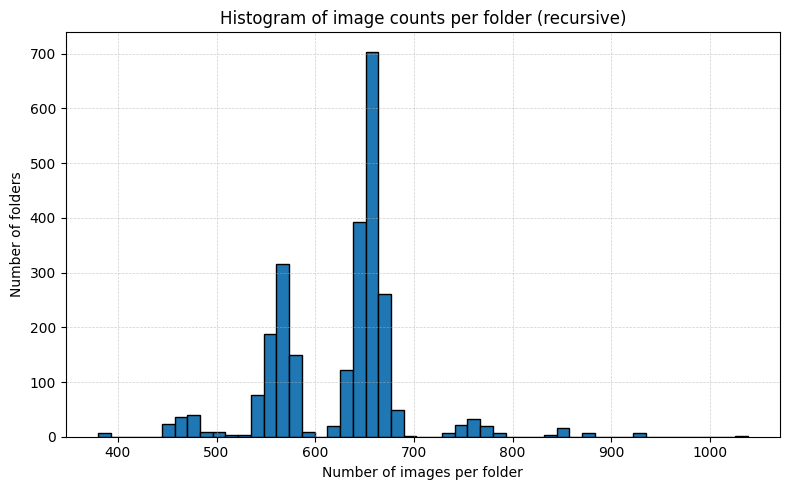

In [25]:
# Default parameters
DEFAULT_ROOT = "/home/phd2/Scrivania/CorsoData/blastocisti/blasto"
DEFAULT_EXTS = {".png", ".jpg", ".jpeg", ".tif", ".tiff", ".bmp", ".gif"}

# Main execution
root = Path(DEFAULT_ROOT).expanduser().resolve()
exts = {e.lower() if e.startswith(".") else f".{e.lower()}" for e in (DEFAULT_EXTS)}

counts_map = collect_counts(root, exts, recursive='recursive')

if not counts_map:
    print(f"No subdirectories found in: {root}")

# Print counts per directory
print(f"Counts of images in subdirectories of: {root}")
width_name = max((len(p.name) for p in counts_map.keys()), default=10)

for d, c in counts_map.items():
    print(f"{d.name:<{width_name}} : {c}")

counts = list(counts_map.values())
title = f"Histogram of image counts per folder ({'recursive'})"
plot_histogram(counts, title)

In [26]:
# find number of counts < 100
below_100 = sum(1 for c in counts if c < 200)
print(f"Number of folders with less than 100 images: {below_100}")

Number of folders with less than 100 images: 0


Counts of images in subdirectories of: /home/phd2/Scrivania/CorsoData/blastocisti/no_blasto
D2013.02.19_S0675_I141_3      : 549
D2013.02.19_S0675_I141_4      : 549
D2013.02.19_S0675_I141_7      : 549
D2013.03.09_S0695_I141_1      : 568
D2013.03.09_S0695_I141_11     : 568
D2013.03.09_S0695_I141_3      : 568
D2013.03.09_S0695_I141_4      : 568
D2013.03.09_S0695_I141_5      : 568
D2013.03.09_S0695_I141_7      : 568
D2013.04.26_S0732_I141_4      : 543
D2013.04.26_S0732_I141_6      : 543
D2013.05.03_S0739_I141_1      : 559
D2013.05.03_S0739_I141_4      : 559
D2013.05.03_S0739_I141_5      : 559
D2013.05.03_S0739_I141_6      : 559
D2013.05.03_S0739_I141_7      : 559
D2013.05.04_S0741_I141_3      : 569
D2013.05.13_S0749_I141_1      : 645
D2013.05.13_S0749_I141_10     : 645
D2013.05.13_S0749_I141_11     : 645
D2013.05.13_S0749_I141_12     : 645
D2013.05.13_S0749_I141_5      : 645
D2013.05.13_S0749_I141_6      : 645
D2013.05.13_S0749_I141_8      : 645
D2013.06.22_S0792_I141_1      : 571
D2013.06

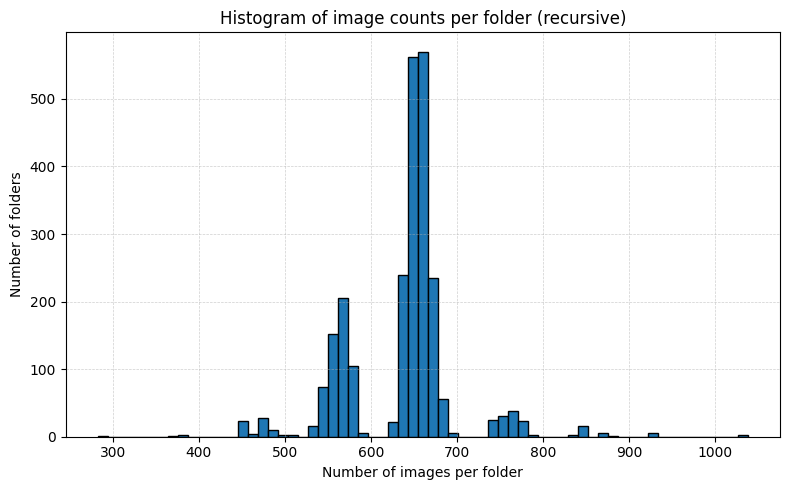

In [27]:
# Default parameters
DEFAULT_ROOT = "/home/phd2/Scrivania/CorsoData/blastocisti/no_blasto"
DEFAULT_EXTS = {".png", ".jpg", ".jpeg", ".tif", ".tiff", ".bmp", ".gif"}

# Main execution
root = Path(DEFAULT_ROOT).expanduser().resolve()
exts = {e.lower() if e.startswith(".") else f".{e.lower()}" for e in (DEFAULT_EXTS)}

counts_map = collect_counts(root, exts, recursive='recursive')

if not counts_map:
    print(f"No subdirectories found in: {root}")

# Print counts per directory
print(f"Counts of images in subdirectories of: {root}")
width_name = max((len(p.name) for p in counts_map.keys()), default=10)

for d, c in counts_map.items():
    print(f"{d.name:<{width_name}} : {c}")

counts = list(counts_map.values())
title = f"Histogram of image counts per folder ({'recursive'})"
plot_histogram(counts, title)

In [28]:
# find number of counts < 100
below_100 = sum(1 for c in counts if c < 200)
print(f"Number of folders with less than 100 images: {below_100}")

Number of folders with less than 100 images: 0
